In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib as plot

In [9]:
df = pd.read_csv('investigation.csv')
colmuns = [
'総利用金額',
'年齢',
'CMイメージ',
'男性ダミー',
'結婚している(子なし)ダミー',
'結婚している(子あり)ダミー',
'麺類ダミー',
'丼物ダミー',
'デザートダミー',
'サイドメニューダミー',
'ソフトドリンクダミー',
'酒類ダミー'
]
df = df[colmuns]

In [10]:
df.head(5)

,総利用金額,年齢,CMイメージ,男性ダミー,結婚している(子なし)ダミー,結婚している(子あり)ダミー,麺類ダミー,丼物ダミー,デザートダミー,サイドメニューダミー,ソフトドリンクダミー,酒類ダミー
0,0,54,3,0,0,0,0,1,0,0,0,0
1,0,46,2,0,0,0,0,0,0,0,0,0
2,0,27,3,0,0,0,1,0,0,0,1,0
3,2200,35,3,0,0,0,0,1,0,0,1,0
4,0,20,3,0,0,0,0,1,1,0,0,0


NameError: name 'plt' is not defined

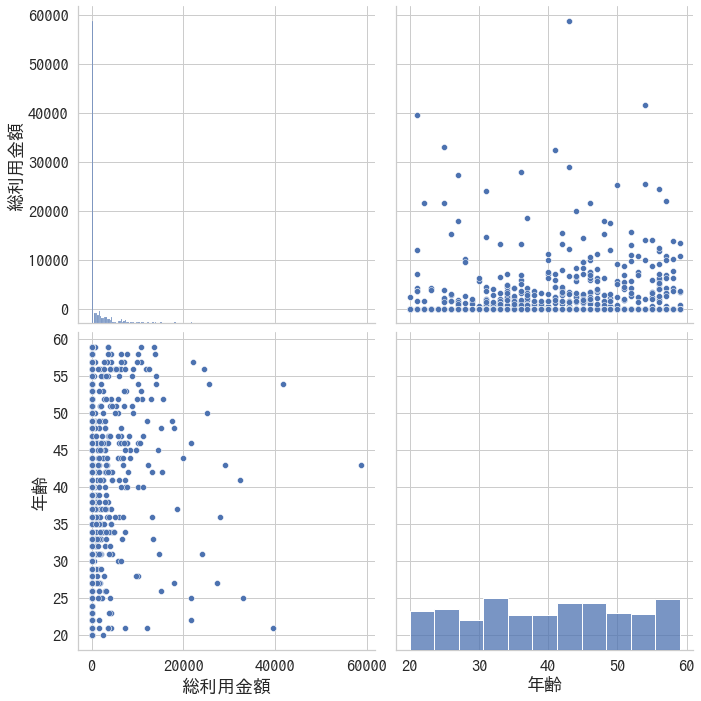

In [12]:
targets = ['総利用金額', '年齢']
sns.set(style='whitegrid',
       font='IPAGothic',
       font_scale=1.5,
       context='notebook')
sns.pairplot(df[targets], height=5)
plt.show

In [13]:
X = df.drop('総利用金額', 1)
X = sm.add_constant(X)
y = df['総利用金額']
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  総利用金額   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     5.022
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           1.18e-07
Time:                        09:58:51   Log-Likelihood:                -9870.5
No. Observations:                1000   AIC:                         1.976e+04
Df Residuals:                     988   BIC:                         1.982e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2751.1098   1011.654     -2.719      0.007   -4736.347    -765.872
年齢                28.8647     15.076      1.915      0.056      -0.720      58.449
CMイメージ           892.7097    259.463      3.441      0.001     383.547    1401.873
男性ダミー           1090.9741    317.810      3.433      0.001     467.314    1714.634
結婚している(子なし)ダミー   175.3581    514.985      0.341      0.734    -835.232    1185.948
結婚している(子あり)ダミー   408.5339    359.858      1.135      0.257    -297.640    1114.708
麺類ダミー           -504.3812    333.876     -1.511      0.131   -1159.570     150.807
丼物ダミー            -39.3775    310.899     -0.127      0.899    -649.476     570.721
デザートダミー          642.6305    583.113      1.102      0.271    -501.653    1786.914
サイドメニューダミー       525.7206    479.314      1.097      0.273    -414.870    1466.311
ソフトドリンクダミー      -120.3921    414.051     -0.291      0.771    -932.913     692.129
酒類ダミー           1056.5693    415.497      2.543      0.011     241.211    1871.928
==============================================================================
Omnibus:                     1046.401   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59732.762
Skew:                           5.009   Prob(JB):                         0.00
Kurtosis:                      39.513   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='coef'>

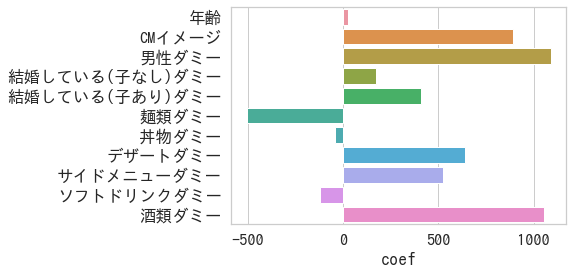

In [17]:
coefs = [result.params[x+1] for x in range(len(colmuns)-1)]
coef_df = pd.DataFrame({
 'coef': coefs
}, index=colmuns[1:])
sns.barplot(x="coef",
            y=coef_df.index,
            data=coef_df)